In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### First import of the dataset

In [3]:
df = pd.read_csv("C:/Users/Weng/Desktop/Web economics/Dataset/train.csv")
df_v = pd.read_csv("C:/Users/Weng/Desktop/Web economics/Dataset/validation.csv")
#df_test = pd.read_csv("C:/Users/Weng/Desktop/Web economics/Dataset/test.csv")

In [4]:
df.head(n=3)

,click,weekday,hour,bidid,logtype,userid,useragent,IP,region,city,...,slotheight,slotvisibility,slotformat,slotprice,creative,bidprice,payprice,keypage,advertiser,usertag
0,0,1,14,fdfae6789b787899f1b875de3ab8b21a,1,u_Vh1OPkFv3q5CFdR,windows_ie,180.107.112.*,80,85,...,60,1,0,5,612599432d200b093719dd1f372f7a30,300,54,bebefa5efe83beee17a3d245e7c5085b,1458,"13866,10063"
1,0,2,20,372883147cdefbc495fb5082f79dde9b,1,u_VhkRL6dCOTLsq-c,windows_chrome,125.120.199.*,94,95,...,250,1,0,5,8dff45ed862a740986dbe688aafee7e5,249,42,15b749127478946f161a54dc0dad27c8,3476,"10063,10111"
2,0,5,9,2912cb5947e1fad450e2473c2f61ef75,1,u_VhkyORMrD8TP3GL,windows_ie,120.196.64.*,216,217,...,280,0,1,0,77819d3e0b3467fe5c7b16d68ad923a1,300,76,bebefa5efe83beee17a3d245e7c5085b,1458,10063


### Second import of the predicted clicks

In [5]:
df_predict = pd.read_csv("C:/Users/Weng/Desktop/Web economics/Github/Web-Economics-master/click_pred.csv")
df_L1 = pd.read_csv("C:/Users/Weng/Desktop/Web economics/Github/Web-Economics/click_pred_l1reg.csv", header = None)
df_bidprice = pd.read_csv("C:/Users/Weng/Desktop/Web economics/Github/Web-Economics-master/out.csv")

In [6]:
df_L1.columns = ['bidid','click_n','click']

In [7]:
#Re-naming of the columns
df_predict['v_click'] = df_v.click
df_predict.columns = ['bidid', 'click', 'v_click']

In [8]:
df_predict[(df_predict['click']==1)&(df_predict.v_click==1)].shape

(16, 3)

In [9]:
df_predict.head(n=3)

,bidid,click,v_click
0,91c6a6b9e90c0f54d3230815a5a3e22e,0,0
1,24b3621ad3b063b6c09c541781d534b3,0,0
2,6e7bce0a9ad42f479827d37bf9618a9d,0,0


#### Search function for that particular bidid impression 

In [10]:
df_v[df_v.bidid == 'd939cd3025fba6ee162860e5cb4fad21']

,click,weekday,hour,bidid,logtype,userid,useragent,IP,region,city,...,slotheight,slotvisibility,slotformat,slotprice,creative,bidprice,payprice,keypage,advertiser,usertag
1902,0,1,16,d939cd3025fba6ee162860e5cb4fad21,1,u_Vh1CO5MPPcMvwBn,windows_ie,58.42.132.*,298,303,...,90,0,0,70,d01411218cc79bc49d2a4078c4093b76,241,77,b2e35064f3549d447edbbdfb1f707c8c,3427,"10059,13403,10063,10006,10077,10024,10111"


In [11]:
#df_v.ix[df_predict[df_predict[' click'] == 1].index].click

#### Logistic regression predicts the probability of yes of no ?

In [12]:
# add an inverse powerlaw between -1 and 0
df_L1.head(n=3)  

,bidid,click_n,click
0,91c6a6b9e90c0f54d3230815a5a3e22e,0.999681,0.000319
1,24b3621ad3b063b6c09c541781d534b3,0.992683,0.007317
2,6e7bce0a9ad42f479827d37bf9618a9d,0.996831,0.003169


#### Train and test split

In [13]:
def shuffle_df(dataframe):
    ''' Shuffles the dataframe as well as dropping the un-used columns  '''
    #Randomise the trainning set
    dataframe.update(dataframe.sample(frac = 1,random_state = 10).reset_index(drop=True))
    dataframe.drop(['userid','logtype','url','urlid','keypage'],1, inplace = True)
    return dataframe.head()

In [14]:
shuffle_df(df)

,click,weekday,hour,bidid,useragent,IP,region,city,adexchange,domain,...,slotwidth,slotheight,slotvisibility,slotformat,slotprice,creative,bidprice,payprice,advertiser,usertag
0,0,0,21,e9ad7ef501737a987b0257b7208367e7,windows_maxthon,111.176.185.*,183,187,4,7b96227419ce67b1179cd0b26094d642,...,960,90,FirstView,Na,30,10717,294,31,2821,"10140,10006,13866,10110,10063"
1,0,0,12,67ec7b6fc7ba29c332f75b0b7e9199b4,windows_firefox,121.18.72.*,3,9,2,DFpETupRBqT9wY185SqfNX,...,336,280,2,0,5,77819d3e0b3467fe5c7b16d68ad923a1,300,276,1458,"13866,10006,10063,10059,10052,10110"
2,0,1,18,3c16184b8580e3c7de65a4fa3ddf1137,windows_ie,116.19.245.*,216,226,2,b073a38d59c24aa29055ffce70a9eaac,...,200,200,FirstView,Na,5,7319,277,142,2259,null
3,0,4,11,0c85c2bf8d9572e2ace2cc1c4ee9a2c4,windows_chrome,115.237.133.*,94,100,3,3FF-e59aG5syJqKbuKz,...,1000,90,0,0,70,832b91d59d0cb5731431653204a76c0e,300,70,1458,"13866,10006,10024,10083,10063,13403,10077,10110"
4,0,1,20,d373c7c4c4b17fa2b06dccfe24e2144b,windows_ie,110.183.149.*,15,24,1,k1Sgtx5RdousJhb4uSFK,...,728,90,0,1,0,48f2e9ba15708c0146bda5e1dd653caa,300,68,1458,"13866,10111"


#### Function works for training only - (Uses bidprice and payprice)

In [15]:
from sklearn.model_selection import train_test_split
x_feat = df.ix[:,1:]
y_targets = df['click']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(x_feat, y_targets, test_size=0.2,random_state=4)

In [17]:
#ORTB1 - requires a prediction on the CTR

#### Lets assume that I have the prediction for the validation + probability and implement a strategy

In [18]:
print('----------------------------------------------------------')
print(df_predict.head()) 
print('----------------------------------------------------------')
print("Predicted click probability")
print('----------------------------------------------------------')
print(df_L1.head())

----------------------------------------------------------
                              bidid  click  v_click
0  91c6a6b9e90c0f54d3230815a5a3e22e      0        0
1  24b3621ad3b063b6c09c541781d534b3      0        0
2  6e7bce0a9ad42f479827d37bf9618a9d      0        0
3  6873feca381b8293bf418ba8408a014c      0        0
4  7e6430333c552cf0b32bb21dc792d2df      0        0
----------------------------------------------------------
Predicted click probability
----------------------------------------------------------
                              bidid   click_n     click
0  91c6a6b9e90c0f54d3230815a5a3e22e  0.999681  0.000319
1  24b3621ad3b063b6c09c541781d534b3  0.992683  0.007317
2  6e7bce0a9ad42f479827d37bf9618a9d  0.996831  0.003169
3  6873feca381b8293bf418ba8408a014c  0.998203  0.001797
4  7e6430333c552cf0b32bb21dc792d2df  0.998889  0.001111


#### Bidding strategy is to use ORTB 1

In [19]:
budget = 6250
print('Budget = ' + str(budget) + ' RMB' )

Budget = 6250 RMB


In [20]:
#Initial bid price
bid_0 = 70

#### First estimate your pCTR

In [21]:
#Clicked impressions
df_v[df_v.click == 1].head(n=3)

,click,weekday,hour,bidid,logtype,userid,useragent,IP,region,city,...,slotheight,slotvisibility,slotformat,slotprice,creative,bidprice,payprice,keypage,advertiser,usertag
478,1,5,14,3d7ac08eeeff0f85f2753777d46f49f9,1,u_Z0pCCnuwOvqUgb2,windows_ie,221.1.64.*,146,153,...,90,0,0,70,a10c31a8ff5f42930b4c34035e523886,241,77,d29e59bf0f7f8243858b8183f14d4412,3358,"10075,10684,10083,10063,10059,10006,10048,10111"
1604,1,5,12,ef4c9631ba25c5cce79668bed7ee526e,1,u_DAQCs2F0wNW,android_safari,1.206.78.*,298,304,...,50,OtherView,Na,5,12987,277,214,null,2997,null
2417,1,5,13,b564861ce7c22649602f6548412a7114,1,u_VhTiLJTGOHs6qd8,windows_chrome,183.209.181.*,80,83,...,280,2,0,5,77819d3e0b3467fe5c7b16d68ad923a1,300,170,bebefa5efe83beee17a3d245e7c5085b,1458,"11278,10063,10024,10111"


In [22]:
#All bids you have won
df_v[df_v.payprice < bid_0]

,click,weekday,hour,bidid,logtype,userid,useragent,IP,region,city,...,slotheight,slotvisibility,slotformat,slotprice,creative,bidprice,payprice,keypage,advertiser,usertag
5,0,1,16,903211f027ca70f611544f42b94db094,1,u_VhTTPRKdOIm2Q-C,windows_chrome,116.52.130.*,308,309,...,250,0,1,0,e1af08818a6cd6bbba118bb54a651961,238,49,a5d0bde104fea52ea466c77b37948424,3476,"10077,10075,10059,10052,10083,10031,10057,1000..."
6,0,3,18,15274113eac79b065e186c1962c33632,1,u_Vh5hL5mAOIuVemB,windows_ie,180.173.153.*,79,79,...,90,0,0,52,b90c12ed2bd7950c6027bf9c6937c48a,300,52,361e128affece850342293213691a043,3386,null
9,0,0,7,2da6d0891a81ac8233bba9bcffde2159,1,u_VhkSOxduLTmcjmL,windows_chrome,60.171.29.*,106,110,...,90,2,0,5,48f2e9ba15708c0146bda5e1dd653caa,300,40,bebefa5efe83beee17a3d245e7c5085b,1458,"10031,13042,10006,10110"
12,0,5,18,11fd76eb04e70dea7dd8a4f8bcd33435,1,u_VhkS1i5APQF_l-E,windows_ie,111.17.162.*,146,154,...,280,2,1,0,77819d3e0b3467fe5c7b16d68ad923a1,300,17,bebefa5efe83beee17a3d245e7c5085b,1458,"10006,10110"
15,0,1,19,1a4b17d2d85a98f58aaf59ba8b8a4835,1,u_VhkRLwFkL6MCQZj,windows_ie,118.119.220.*,276,286,...,90,2,0,5,b90c12ed2bd7950c6027bf9c6937c48a,300,14,361e128affece850342293213691a043,3386,"10006,10063"
17,0,3,15,44cb824571c412c0c61f3ce30a8b7a32,1,u_VhKdPDppDQm6X-L,windows_ie,119.120.78.*,216,234,...,280,2,1,0,77819d3e0b3467fe5c7b16d68ad923a1,300,32,bebefa5efe83beee17a3d245e7c5085b,1458,"10059,10102,10006,13042,10075,13800,13403,1003..."
20,0,5,12,129ed16223fc0a7b95dc25e239490ce2,1,u_DAQC28C6zkr,windows_ie,122.224.74.*,94,95,...,240,Na,Na,20,12610,294,20,null,2261,null
23,0,4,19,a75ce03fe79f232b5ef220f19f282684,1,u_VhKdLxuyOZ1-Mhk,windows_chrome,123.122.112.*,1,1,...,90,0,0,31,cd6f20e0b2a699c352f2e55a7a2091fd,241,43,d41d8cd98f00b204e9800998ecf8427e,3427,"10063,13866,10006,10059,10111"
24,0,6,20,8f1966174226a09e95d4f4ad2088de0d,1,u_VhnrCnp0O6jIefc,windows_ie,120.203.71.*,134,135,...,90,2,0,5,48f2e9ba15708c0146bda5e1dd653caa,300,68,bebefa5efe83beee17a3d245e7c5085b,1458,"13866,10063,10111"
25,0,4,1,2e6dc1218f6b5a8a007e4dbce0442122,1,u_Vh5_Z3s6Den4GWR,windows_chrome,175.23.131.*,55,60,...,90,0,0,50,86c2543527c86a893d4d4f68810a0416,300,50,43f4a37f42a7c5e6219e2601b26c6976,3386,"10059,10063,10075"


In [23]:
df_v[df_v.payprice < bid_0]

,click,weekday,hour,bidid,logtype,userid,useragent,IP,region,city,...,slotheight,slotvisibility,slotformat,slotprice,creative,bidprice,payprice,keypage,advertiser,usertag
5,0,1,16,903211f027ca70f611544f42b94db094,1,u_VhTTPRKdOIm2Q-C,windows_chrome,116.52.130.*,308,309,...,250,0,1,0,e1af08818a6cd6bbba118bb54a651961,238,49,a5d0bde104fea52ea466c77b37948424,3476,"10077,10075,10059,10052,10083,10031,10057,1000..."
6,0,3,18,15274113eac79b065e186c1962c33632,1,u_Vh5hL5mAOIuVemB,windows_ie,180.173.153.*,79,79,...,90,0,0,52,b90c12ed2bd7950c6027bf9c6937c48a,300,52,361e128affece850342293213691a043,3386,null
9,0,0,7,2da6d0891a81ac8233bba9bcffde2159,1,u_VhkSOxduLTmcjmL,windows_chrome,60.171.29.*,106,110,...,90,2,0,5,48f2e9ba15708c0146bda5e1dd653caa,300,40,bebefa5efe83beee17a3d245e7c5085b,1458,"10031,13042,10006,10110"
12,0,5,18,11fd76eb04e70dea7dd8a4f8bcd33435,1,u_VhkS1i5APQF_l-E,windows_ie,111.17.162.*,146,154,...,280,2,1,0,77819d3e0b3467fe5c7b16d68ad923a1,300,17,bebefa5efe83beee17a3d245e7c5085b,1458,"10006,10110"
15,0,1,19,1a4b17d2d85a98f58aaf59ba8b8a4835,1,u_VhkRLwFkL6MCQZj,windows_ie,118.119.220.*,276,286,...,90,2,0,5,b90c12ed2bd7950c6027bf9c6937c48a,300,14,361e128affece850342293213691a043,3386,"10006,10063"
17,0,3,15,44cb824571c412c0c61f3ce30a8b7a32,1,u_VhKdPDppDQm6X-L,windows_ie,119.120.78.*,216,234,...,280,2,1,0,77819d3e0b3467fe5c7b16d68ad923a1,300,32,bebefa5efe83beee17a3d245e7c5085b,1458,"10059,10102,10006,13042,10075,13800,13403,1003..."
20,0,5,12,129ed16223fc0a7b95dc25e239490ce2,1,u_DAQC28C6zkr,windows_ie,122.224.74.*,94,95,...,240,Na,Na,20,12610,294,20,null,2261,null
23,0,4,19,a75ce03fe79f232b5ef220f19f282684,1,u_VhKdLxuyOZ1-Mhk,windows_chrome,123.122.112.*,1,1,...,90,0,0,31,cd6f20e0b2a699c352f2e55a7a2091fd,241,43,d41d8cd98f00b204e9800998ecf8427e,3427,"10063,13866,10006,10059,10111"
24,0,6,20,8f1966174226a09e95d4f4ad2088de0d,1,u_VhnrCnp0O6jIefc,windows_ie,120.203.71.*,134,135,...,90,2,0,5,48f2e9ba15708c0146bda5e1dd653caa,300,68,bebefa5efe83beee17a3d245e7c5085b,1458,"13866,10063,10111"
25,0,4,1,2e6dc1218f6b5a8a007e4dbce0442122,1,u_Vh5_Z3s6Den4GWR,windows_chrome,175.23.131.*,55,60,...,90,0,0,50,86c2543527c86a893d4d4f68810a0416,300,50,43f4a37f42a7c5e6219e2601b26c6976,3386,"10059,10063,10075"


In [24]:
p_clicks = df_predict.ix[df_v[df_v.payprice < bid_0].index].click.sum() 

In [25]:
w_impressions = df_predict.ix[df_v[df_v.payprice < bid_0].index].shape[0]

In [26]:
p_CTR =(p_clicks/w_impressions)*100

In [27]:
p_CTR

0.041435817922996214

#### Bidding strategy - Upper bound is the bid price

In [28]:
lan = 5.2e-7

In [29]:
c= 50

In [30]:
inner_eq= ((c/lan)*p_CTR)+ (c^2)
inner_eq

3984261.2618265594

In [31]:
ORTB1 = np.sqrt(inner_eq)-50

In [32]:
ORTB1

1946.0614373877772

#### Bidding strategy is to use ORTB 2 -Put this into a function 

In [33]:
theta = 0.007317

In [34]:
root = ((c**2)*(lan**2))+(theta**2)
root

5.3539165e-05

In [35]:
root_sq = np.sqrt(root)
root_sq

0.0073170461936494565

In [36]:
np.sqrt(((c**2)*(lan**2))+(theta**2)) #Square root is the same

0.0073170461936494565

In [37]:
inner_eq2 = (theta + np.sqrt(((c**2)*(lan**2))+(theta**2)))/ (c*lan) #main line

In [38]:
inner_eq2

562.84793052497912

In [39]:
inner_calc = ((inner_eq2)**(1/3))-((inner_eq2)**(-1/3))
inner_calc

8.135403352428364

In [40]:
c*(((inner_eq2)**(1/3))-((inner_eq2)**(-1/3))) #Secondary line

406.77016762141818

In [41]:
ORTB2 = c*inner_calc 

In [42]:
ORTB2

406.77016762141818

In [43]:
2**(-2) #Testing power function

0.25

#### ORTB2 def function

In [44]:
# May make a plot of the c value and the metrics
# c= 5.22 > 1562.5  | c=8.18 > 3125   | c=14.5 > 6250 | c=44.15 > 12500 | c=195.2 > 25000 

In [49]:
def ORTB2(KPI_df, lambda_value=5.72236765935e-07, c=15):    #Original lambda_value=5.2e-7 , c=14.5
    '''Applies the Optimal bidding strategy method 2 / Output returns the bidid and bidprice'''
    ORTB2 = []
    for theta in df_L1.click:
        inner_eq2 = (theta + np.sqrt(((c**2)*(lambda_value**2))+(theta**2)))/ (c*lambda_value) 
        ORTB2.append(round(c*(((inner_eq2)**(1/3))-((inner_eq2)**(-1/3)))))
    
    KPI_df['ORTB2'] = ORTB2  #Appends the column to KPI_df
    return (KPI_df[['bidid','ORTB2']])
    

In [ ]:
.to_csv('ORTB2_results',encoding='utf-8')

In [50]:
bid_p = ORTB2(df_L1)

In [52]:
bid_p.to_csv('ORTB2_results',encoding='utf-8')

,bidid,ORTB2
0,91c6a6b9e90c0f54d3230815a5a3e22e,59.0
1,24b3621ad3b063b6c09c541781d534b3,178.0
2,6e7bce0a9ad42f479827d37bf9618a9d,134.0
3,6873feca381b8293bf418ba8408a014c,110.0
4,7e6430333c552cf0b32bb21dc792d2df,93.0
5,903211f027ca70f611544f42b94db094,48.0
6,15274113eac79b065e186c1962c33632,82.0
7,9c963e762671efbc15c4e9fb3cef9c46,45.0
8,a483f16043e9f0057d542ee724cd81cb,30.0
9,2da6d0891a81ac8233bba9bcffde2159,112.0


In [47]:
#Change the last 2 lines for tuning clicks or costs
def ORTB2_tuning(KPI_df,Budget, lambda_value=5.2e-7 , c=14.5):
    '''Hyper parameter tuning/ Output returns the bidid and bidprice'''
    ORTB2 = []
    for theta in df_L1.click:
        inner_eq2 = (theta + np.sqrt(((c**2)*(lambda_value**2))+(theta**2)))/ (c*lambda_value) 
        ORTB2.append(round(c*(((inner_eq2)**(1/3))-((inner_eq2)**(-1/3)))))
    
    KPI_df['ORTB2'] = ORTB2  #Appends the column to KPI_df
    bid_p = KPI_df[['bidid','ORTB2']]
    #Summary of the results
    #print ('Summary report')
    print ('---------------------------------------------------')
    if df_v[bid_p.ORTB2 > df_v.payprice].payprice.sum()/1000 >= Budget:
        print ('Over-Budget')
    else: 
        print('Within-Budget')
    print ('Budget: '+ str(budget)+ ' FEN')
    print ('Total Cost: '+ str(df_v[bid_p.ORTB2 > df_v.payprice].payprice.sum()/1000)+ ' FEN')
    print ('Clicks acquired: ' + str((np.count_nonzero(df_v[bid_p.ORTB2 > df_v.payprice].click)))+ ' / ' + str(df_v.click.sum()))
    print ('Impressions won: ' + str(df_v[bid_p.ORTB2 > df_v.payprice].shape[0]) + ' out of ' + str(df_v.click.shape[0]))
    print ('CTR: '+ str((np.count_nonzero(df_v[bid_p.ORTB2 > df_v.payprice].click) / df_v[bid_p.ORTB2 > df_v.payprice].shape[0])*100))
    print ('eCPC: '+ str((df_v[bid_p.ORTB2 > df_v.payprice].payprice.sum()/1000)/(np.count_nonzero(df_v[bid_p.ORTB2 > df_v.payprice].click))))    
    
    #Number of clicks obtained
    Cost = []
    Cost += [df_v[bid_p.ORTB2 > df_v.payprice].payprice.sum()/1000]
    return (Cost)

In [246]:
df_v[bid_p.ORTB2 > df_v.payprice].payprice.sum()/1000

6198.065

In [169]:
np.logspace(7, 8, num=5, base=0.1)

array([  1.00000000e-07,   5.62341325e-08,   3.16227766e-08,
         1.77827941e-08,   1.00000000e-08])

In [51]:
ORTB2_tuning(df_L1,6250,5.72236765935e-07,15)

---------------------------------------------------
Within-Budget
Budget: 6250 FEN
Total Cost: 6082.933 FEN
Clicks acquired: 150 / 226
Impressions won: 138024 out of 299749
CTR: 0.10867675186924013
eCPC: 40.552886666666666


[6082.933]

In [ ]:
#Variable is the lambda with fixed c values
c=15
Cost_4=[]
for i in np.logspace(8, 5, num=100, base=0.1):
    Cost_4 += ORTB2_tuning(df_L1,6250, i , c)
    print ('lambda = ' + str(i))
    print ('c_value = ' + str(c))
print(Cost_4)

In [262]:
% store Cost_4

Stored 'Cost_3' (list)


In [263]:
index

array([  1.00000000e-08,   1.07226722e-08,   1.14975700e-08,
         1.23284674e-08,   1.32194115e-08,   1.41747416e-08,
         1.51991108e-08,   1.62975083e-08,   1.74752840e-08,
         1.87381742e-08,   2.00923300e-08,   2.15443469e-08,
         2.31012970e-08,   2.47707636e-08,   2.65608778e-08,
         2.84803587e-08,   3.05385551e-08,   3.27454916e-08,
         3.51119173e-08,   3.76493581e-08,   4.03701726e-08,
         4.32876128e-08,   4.64158883e-08,   4.97702356e-08,
         5.33669923e-08,   5.72236766e-08,   6.13590727e-08,
         6.57933225e-08,   7.05480231e-08,   7.56463328e-08,
         8.11130831e-08,   8.69749003e-08,   9.32603347e-08,
         1.00000000e-07,   1.07226722e-07,   1.14975700e-07,
         1.23284674e-07,   1.32194115e-07,   1.41747416e-07,
         1.51991108e-07,   1.62975083e-07,   1.74752840e-07,
         1.87381742e-07,   2.00923300e-07,   2.15443469e-07,
         2.31012970e-07,   2.47707636e-07,   2.65608778e-07,
         2.84803587e-07,

In [264]:
#Click = 5 / Click_1 = 10 / Click_2 = 15    - C -values

In [265]:
% store 

Stored variables and their in-db values:
Clicks               -> [192, 191, 190, 188, 186, 186, 185, 185, 184, 182,
Clicks_1             -> [206, 205, 204, 202, 200, 199, 198, 198, 198, 197,
Clicks_2             -> [211, 211, 211, 211, 210, 210, 210, 210, 208, 207,
Cost_1               -> [12648.187, 12385.524, 12121.887, 11853.563, 11590
Cost_2               -> [17332.143, 17105.672, 16885.78, 16650.056, 16411.
Cost_3               -> [19518.271, 19346.29, 19173.459, 18995.393, 18802.
acc_df               ->         Predict  Test
0           0.0   0.0
1     
graph_df             ->      Bid_value  Clicks  Impressions_won  Win_ratio


In [195]:
index = np.logspace(8, 5, num=100, base=0.1)

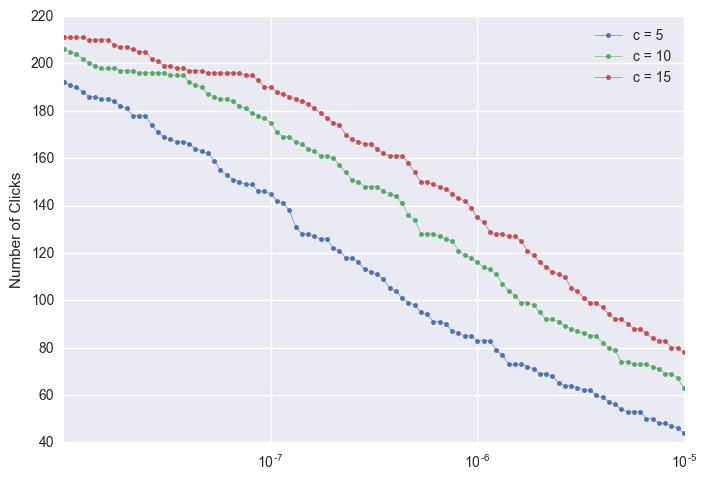

In [245]:
ax = pd.DataFrame([Clicks,Clicks_1,Clicks_2], columns=index).transpose().plot(marker='.', linewidth =0.4,logx=True , legend=['5','10','15'])
ax.legend(['c = 5','c = 10','c = 15'], loc='best')
ax.set_ylabel('Number of Clicks')

(0.0, 22500)

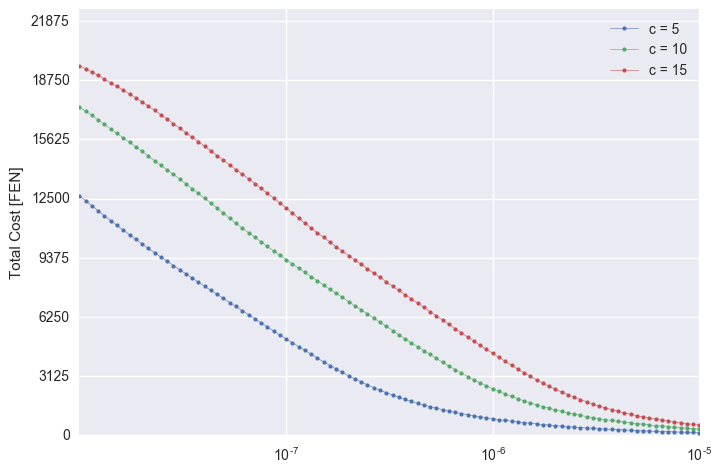

In [304]:
ax2 = pd.DataFrame([Cost_1,Cost_2,Cost_3], columns=index).transpose().plot(marker='.',markersize=6, linewidth =0.4,logx=True , legend=['5','10','15'])
ax2.legend(['c = 5','c = 10','c = 15'], loc='best')
ax2.set_ylabel('Total Cost [FEN]')
# c = 15 first within budget 5.72236765935e-07
ax2.set_yticks(np.arange(0,22500,3125))
ax2.set_ylim(top=22500)  

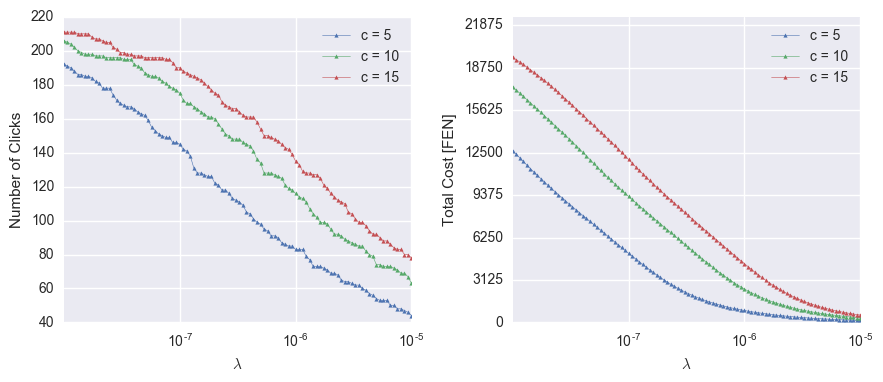

In [322]:
fig, axes = plt.subplots(nrows= 1, ncols = 2, figsize=(9,4) )

ax = pd.DataFrame([Clicks,Clicks_1,Clicks_2], columns=index).transpose().plot(marker='^',markersize=3, linewidth =0.4,logx=True , legend=['5','10','15'],ax=axes[0])
ax.legend(['c = 5','c = 10','c = 15'], loc='best')
ax.set_ylabel('Number of Clicks')
ax.set_xlabel('$\lambda$')

ax2 = pd.DataFrame([Cost_1,Cost_2,Cost_3], columns=index).transpose().plot(marker='^',markersize=3, linewidth =0.4,logx=True , legend=['5','10','15'],ax=axes[1])
ax2.legend(['c = 5','c = 10','c = 15'], loc='best')
ax2.set_ylabel('Total Cost [FEN]')
# c = 15 first within budget 5.72236765935e-07
ax2.set_yticks(np.arange(0,22500,3125))
ax2.set_ylim(top=22500) 
ax2.set_xlabel('$\lambda$')

plt.tight_layout()

#Save image
#plt.savefig('Hyper-parameter-tuning.jpg',bbox_inches='tight')

In [ ]:
Matrix =[]
for i in np.logspace(7, 5, num=5, base=0.1):
    Clicks=[]
    for j in np.arange(5,30,10):
        Clicks += ORTB2_tuning(df_L1,6250, i , j)
        print ('lambda = ' + str(i))
        print ('c_value = ' + str(j))
    print(Clicks)
    Matrix += Clicks
print(Matrix)
    

In [172]:
ORTB2_tuning(df_L1,6250)

---------------------------------------------------
Within-Budget
Clicks acquired: 150 / 226


[150]

In [61]:
#Re-define the budget 
budget = 6250

In [77]:
print ('Summary report')
print ('---------------------------------------------------')
if df_v[bid_p.ORTB2 > df_v.payprice].payprice.sum()/1000 >= budget: 
    print ('Over-Budget')
else: 
    print('Within-Budget')
print ('Budget: '+ str(budget)+ ' FEN')
print ('Total Cost: '+ str(df_v[bid_p.ORTB2 > df_v.payprice].payprice.sum()/1000)+ ' FEN')
print ('Clicks acquired: ' + str((np.count_nonzero(df_v[bid_p.ORTB2 > df_v.payprice].click)))+ ' / ' + str(df_v.click.sum()))
print ('Impressions won: ' + str(df_v[bid_p.ORTB2 > df_v.payprice].shape[0]) + ' out of ' + str(df_v.click.shape[0]))
print ('CTR: '+ str((np.count_nonzero(df_v[bid_p.ORTB2 > df_v.payprice].click) / df_v[bid_p.ORTB2 > df_v.payprice].shape[0])*100))
print ('eCPC: '+ str((df_v[bid_p.ORTB2 > df_v.payprice].payprice.sum()/1000)/(np.count_nonzero(df_v[bid_p.ORTB2 > df_v.payprice].click))))

Summary report
---------------------------------------------------
Within-Budget
Budget: 6250 FEN
Total Cost: 6198.065 FEN
Clicks acquired: 150 / 226
Impressions won: 139920 out of 299749
CTR: 0.10720411663807891
eCPC: 41.320433333333334


#### Comparison of the optimal bidding and budgets

In [49]:
#1/16th of the budget
ortb2_1562 =[1562.5,1557.806,62978,99,0.15719775159579535,15.735414141414141]
#1/8th of the budget
ortb2_3125 = [3125,3120.495,93155,124,0.13311148086522462,25.165282258064515]
#1/4th of the budget
ortb2_6250=[6250,6198.065,139920,150,0.10720411663807891,41.320433333333334]
#1/2th of the budget
ortb2_12500=[12500,12494.037,203673,189,0.09279580504043246,66.10601587301588]
#Full budget
ortb2_full =[25000,17324.199,236447,207,0.08754604625983835,83.69178260869566]

In [50]:
df_ORTB2 = pd.DataFrame([ortb2_1562,ortb2_3125,ortb2_6250,ortb2_12500,ortb2_full])  #Put another square brackets to get the data horizonatally
df_ORTB2.columns=['Budget', 'Total_cost', 'Impressions_won','Clicks', 'CTR', 'eCPC']

In [51]:
df_ORTB2

,Budget,Total_cost,Impressions_won,Clicks,CTR,eCPC
0,1562.5,1557.806,62978,99,0.157198,15.735414
1,3125.0,3120.495,93155,124,0.133111,25.165282
2,6250.0,6198.065,139920,150,0.107204,41.320433
3,12500.0,12494.037,203673,189,0.092796,66.106016
4,25000.0,17324.199,236447,207,0.087546,83.691783


#### Preliminary dataframe

In [52]:
prelim_1562= [1562.5,1562,20063,14,0.0697802,111.5714286]  #1/16th of the budget
prelim_3125= [3125,3124.999,39828,22,0.0552375,142.0454091]  #1/8th of the budget
prelim_6250= [6250,6249.999,79936,63,0.0788131,99.20633333]   #1/4th of the budget
prelim_12500= [12500,12500,160031,116,0.072486,107.7586207]   #1/2th of the budget
prelim_full= [25000,23097.285,295987,214,0.0723005,107.9312383]  #Full budget

In [53]:
df_prelim = pd.DataFrame([prelim_1562,prelim_3125,prelim_6250,prelim_12500,prelim_full])  #Put another square brackets to get the data horizonatally
df_prelim.columns=['Budget', 'Total_cost', 'Impressions_won','Clicks', 'CTR', 'eCPC']

In [54]:
df_prelim

,Budget,Total_cost,Impressions_won,Clicks,CTR,eCPC
0,1562.5,1562.000,20063,14,0.069780,111.571429
1,3125.0,3124.999,39828,22,0.055238,142.045409
2,6250.0,6249.999,79936,63,0.078813,99.206333
3,12500.0,12500.000,160031,116,0.072486,107.758621
4,25000.0,23097.285,295987,214,0.072301,107.931238


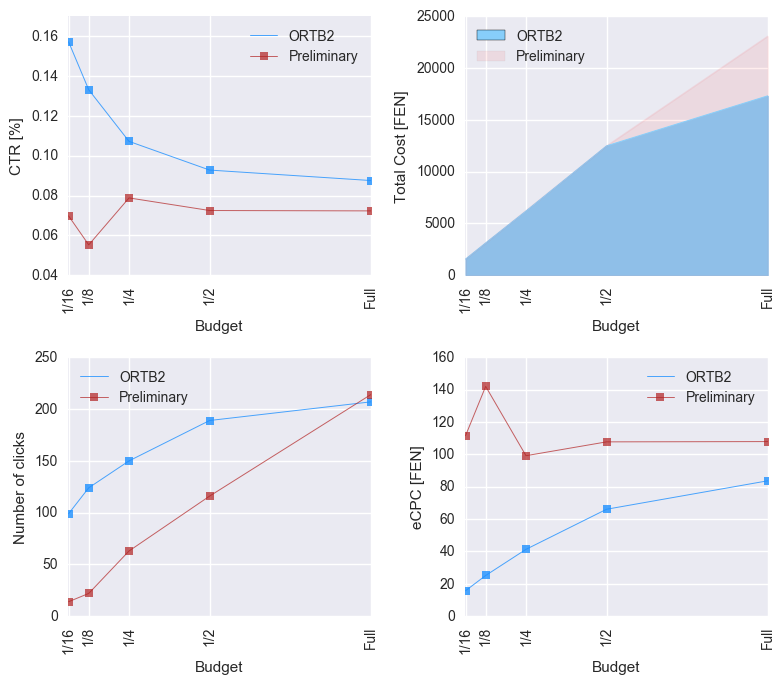

In [57]:
#Multiple plots
fig, axes = plt.subplots(nrows= 2, ncols = 2, figsize=(8,7) )
ax1 = df_ORTB2.plot(x='Budget', y='CTR',label= 'ORTB2', markersize=6,
                    ax=axes[0,0],linewidth =0.7,marker = 's', c='DodgerBlue', alpha=0.8)
ax1 = df_prelim.plot(x='Budget', y='CTR', label = 'Preliminary',markersize=6,
                    ax=axes[0,0],linewidth =0.7,marker = 's',c ='firebrick', alpha =0.7)
ax1.set_xticks(df_ORTB2.Budget)
labels = ['1/16','1/8','1/4','1/2','Full']
ax1.set_xticklabels(labels, rotation=90)
ax1.set_ylim(top=0.17)  
ax1.set_xlim(left=1500)   
ax1.set_ylabel('CTR [%]')   #ax1.set_yticks(np.arange(0,0.085,0.01)) use if necessary 

ax2 = df_ORTB2.plot(x='Budget', y='Total_cost',label= 'ORTB2',kind = 'Area',alpha=1,
                    ax=axes[0,1], linewidth =0.7,color='lightskyBlue')
ax2 = df_prelim.plot(x='Budget', y='Total_cost', label = 'Preliminary',kind='Area', alpha=0.07,
                    ax=axes[0,1],linewidth =0.7,color ='red')
ax2.set_xticks(df_ORTB2.Budget)
labels = ['1/16','1/8','1/4','1/2','Full']
ax2.set_xticklabels(labels, rotation=90)
ax2.set_xlim(left=1500) 
ax2.set_ylim(top=25000)  
ax2.set_ylabel('Total Cost [FEN]')

ax3 = df_ORTB2.plot(x='Budget', y='Clicks',label= 'ORTB2', markersize=6,
                    ax=axes[1,0],linewidth =0.7,marker = 's', c='DodgerBlue', alpha=0.8)
ax3 = df_prelim.plot(x='Budget', y='Clicks', label = 'Preliminary',markersize=6,
                    ax=axes[1,0],linewidth =0.7,marker = 's',c ='firebrick', alpha =0.7)
ax3.set_xticks(df_ORTB2.Budget)
labels = ['1/16','1/8','1/4','1/2','Full']
ax3.set_xticklabels(labels, rotation=90)
#ax3.set_ylim(top=0.17)  
ax3.set_xlim(left=1500)   
ax3.set_ylabel('Number of clicks')  

ax4 = df_ORTB2.plot(x='Budget', y='eCPC',label= 'ORTB2', markersize=6,
                    ax=axes[1,1],linewidth =0.7,marker = 's', c='DodgerBlue', alpha=0.8)
ax4 = df_prelim.plot(x='Budget', y='eCPC', label = 'Preliminary',markersize=6,
                    ax=axes[1,1],linewidth =0.7,marker = 's',c ='firebrick', alpha =0.7)
ax4.set_xticks(df_ORTB2.Budget)
labels = ['1/16','1/8','1/4','1/2','Full']
ax4.set_xticklabels(labels, rotation=90)
#ax3.set_ylim(top=0.17)  
ax4.set_xlim(left=1500)   
ax4.set_ylabel('eCPC [FEN]') 

plt.tight_layout()


#Save image
#plt.savefig('ORTB2-vs-Prelim.jpg',bbox_inches='tight')

#### Checkpoint results comparison with the preliminary results

In [49]:
df_v[bid_p.ORTB2 > df_v.payprice].payprice.sum()

6198065

In [465]:
df_v[bid_p.ORTB2 > df_v.payprice].payprice.sum()

144357

In [445]:
np.count_nonzero(df_v[bid_p.ORTB2 > df_v.payprice].click)

130

In [407]:
df_v[bid_p.ORTB2 > df_v.payprice].payprice.sum()

144357

In [269]:
print (bid_p.head(n=15))
print (df_v[['bidid','payprice']].head(n=15))

                               bidid  ORTB2
0   91c6a6b9e90c0f54d3230815a5a3e22e  128.0
1   24b3621ad3b063b6c09c541781d534b3  407.0
2   6e7bce0a9ad42f479827d37bf9618a9d  304.0
3   6873feca381b8293bf418ba8408a014c  249.0
4   7e6430333c552cf0b32bb21dc792d2df  209.0
5   903211f027ca70f611544f42b94db094   99.0
6   15274113eac79b065e186c1962c33632  181.0
7   9c963e762671efbc15c4e9fb3cef9c46   92.0
8   a483f16043e9f0057d542ee724cd81cb   56.0
9   2da6d0891a81ac8233bba9bcffde2159  252.0
10  b887b88eccaf5ba1addf3171e91de883  251.0
11  1eaa2735f8377181ef2f3392bebb34b0  208.0
12  11fd76eb04e70dea7dd8a4f8bcd33435  150.0
13  08f8a8bd7a13c15d0edd6629ff03ce39  221.0
14  b9cee5fbf1999996c46d089e67263c61   34.0
                               bidid  payprice
0   91c6a6b9e90c0f54d3230815a5a3e22e       102
1   24b3621ad3b063b6c09c541781d534b3       118
2   6e7bce0a9ad42f479827d37bf9618a9d        77
3   6873feca381b8293bf418ba8408a014c        77
4   7e6430333c552cf0b32bb21dc792d2df       178
5   903211f027

#### Cross validation

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
scores = cross_val_score(clf, data_train.ix[:,1:], data_train['click'], cv=5)